# Data Science TP2

Ning
06 October 2019

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

# Probability and Statistics

1. For the table of joint probability (given in the assignment), calculate the values:


* $p$<sub>x</sub>$(x)$
* $p$<sub>y</sub>$(y)$
* $p$<sub>x|y</sub>$(x|y = 0)$
* $p$<sub>y|x</sub>$(y|x = 1)$

2. There are two Gaussian (normal) distributions $N(15,81)$ and $N(36,144)$. 

    Gaussian distributions are in the form $N$($\gamma$,$\theta$ <sup>2</sup>), where $\gamma$ is the mean and $\theta$<sup>2</sup> is the standard deviation.

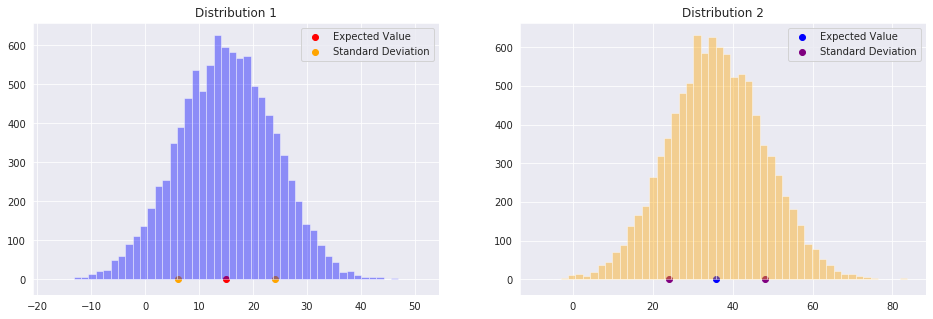

In [3]:
N = 10000
mean1 = 15
variance1 = 81
std1 = math.sqrt(variance1)
mean2 = 36
variance2 = 144
std2 = math.sqrt(variance2)

g1 = np.random.normal(mean1,std1,N)
g2 = np.random.normal(mean2,std2,N)

e_val1 = sum(x*(1/N) for x in g1)
e_val2 = sum(x*(1/N) for x in g2)

f = plt.figure(figsize=(16,5))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,2,1)
    sb.distplot(g1,kde=False,color="blue")
    bx = f.add_subplot(1,2,2)
    sb.distplot(g2,kde=False,color="orange")
    
    ax.scatter(e_val1, 0, color="red", label="Expected Value")
    ax.scatter(mean1-std1,0, color="orange", label="Standard Deviation")
    ax.scatter(mean1+std1,0, color="orange")
    bx.scatter(e_val2, 0, color="blue", label="Expected Value")
    bx.scatter(mean2-std2, 0, color="purple", label="Standard Deviation")
    bx.scatter(mean2+std2, 0, color="purple")
    
    ax.title.set_text('Distribution 1')
    bx.title.set_text('Distribution 2')
    ax.legend(loc="upper right")
    bx.legend(loc="upper right")

## TODO: Explain each parameter:
## TODO: Explain difference between histograms:

# High-dimensional Gaussian Distribution

In [4]:
#generate 10,000 samples
n = 10000

#from a gaussian distribution centered at 0
d1 = np.zeros(1)
d10 = np.zeros(10)
d100 = np.zeros(100)

#with covariance I
i1 = np.identity(1)
i10 = np.identity(10)
i100 = np.identity(100)

#normal distributions
dim1Gaussian = np.random.multivariate_normal(d1, i1, n)
dim10Gaussian = np.random.multivariate_normal(d10, i10, n)
dim100Gaussian = np.random.multivariate_normal(d100, i100, n)

#plot the norm for every x in dimXGaussian
xnorm = 0
norm1 = [0]*len(dim1Gaussian)
for x in range(0, len(dim1Gaussian)):
    xnorm = 0
    for p in range(0, len(dim1Gaussian[x])):
        xnorm += (dim1Gaussian[x][p])**2
    norm1[x] = math.sqrt(xnorm)

xnorm = 0
norm10 = [0]*len(dim10Gaussian)
for x in range(0, len(dim10Gaussian)):
    xnorm = 0
    for p in range(0, len(dim10Gaussian[x])):
        xnorm += (dim10Gaussian[x][p])**2
    norm10[x] = math.sqrt(xnorm)

xnorm = 0
norm100 = [0]*len(dim100Gaussian)
for x in range(0, len(dim100Gaussian)):
    xnorm = 0
    for p in range(0, len(dim100Gaussian[x])):
        xnorm += (dim100Gaussian[x][p])**2
    norm100[x] = math.sqrt(xnorm)

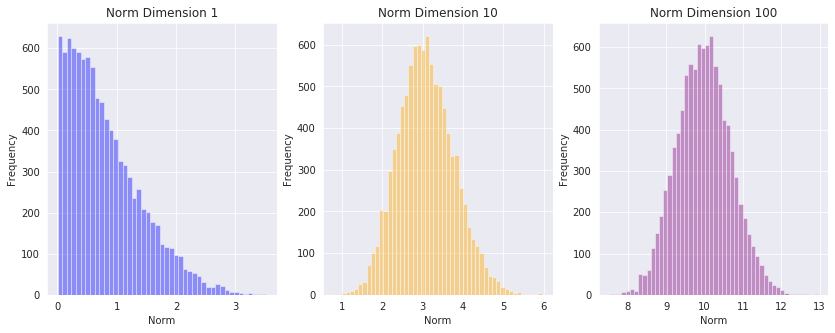

In [5]:
f = plt.figure(figsize=(14,5))
f.tight_layout()
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,3,1)
    sb.distplot(norm1,kde=False,color="blue")
    bx = f.add_subplot(1,3,2)
    sb.distplot(norm10,kde=False,color="orange")
    cx = f.add_subplot(1,3,3)
    sb.distplot(norm100,kde=False,color="purple")
    
    
    ax.title.set_text('Norm Dimension 1')
    bx.title.set_text('Norm Dimension 10')
    cx.title.set_text('Norm Dimension 100')
    ax.set(xlabel="Norm", ylabel="Frequency")
    bx.set(xlabel="Norm", ylabel="Frequency")
    cx.set(xlabel="Norm", ylabel="Frequency")
    

## TODO: Comment on the effect of dim on the distribution of norm(x)

the distribution of the norm starts shifting away from 0, meaning that as dimensions increase we are seeing the distance of each point from other points generally increase (as they spread away from the expected center towards the edge) 

# "Hubness" of High Dimensional Data

In [6]:
samples = []
n = 100
for d in range (1, 101): #in d-dimension
    z_cent = np.zeros(d) #from the zero-mean Gaussian Distribution
    i_var = np.identity(d) #with its variance given by Id the DxD identity matrix
    dimDGaussian_sample = np.random.multivariate_normal(z_cent, i_var, n)
    samples.append(dimDGaussian_sample)

def calc_norm(entry):
    
    norms = []
    xnorm = 0
    for x in range(0, len(entry)):
        xnorm = 0
        for j in range(0, len(entry[x])):
            xnorm += (entry[x][j])**2
        norms.append(math.sqrt(xnorm))
    
    return norms

In [7]:
norms = []
for i in range(0, len(samples)): #create the 2-norms of all samples
    norms.append(calc_norm(samples[i]))

flat_norms = []
for i in range(0, len(norms)):
    for j in range(0, len(norms[i])):
        flat_norms.append(norms[i][j])

In [118]:
#count how many times, N, that norm i is within k of every other norm j.
kNN = [0]*len(flat_norms)
for i in range(0, len(flat_norms)): #compare 'd' against all 'd' in flat_norms
    for j in range(0, len(flat_norms)):
        if(i!=j): #don't compare against yourself
            if abs(flat_norms[i]-flat_norms[j]) <= 0.000275: #distance within range
                kNN[i] += 1

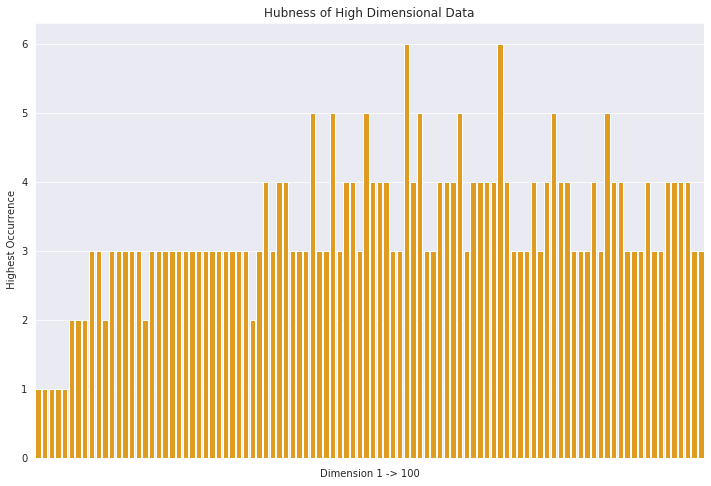

In [119]:
max_N = []
for i in range(0,len(kNN),100):
    max_N.append(max(kNN[i:i+100]))

x = []
for i in range(0,100):
    x.append(i)

max_N_df = pd.DataFrame({'x':x, 'y':max_N})

f = plt.figure(figsize=(12,8))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x='x', y='y', data=max_N_df, color="orange")
    ax.title.set_text("Hubness of High Dimensional Data")
    ax.set(xlabel="Dimension 1 -> 100", ylabel=" Highest Occurrence", xticklabels=[])

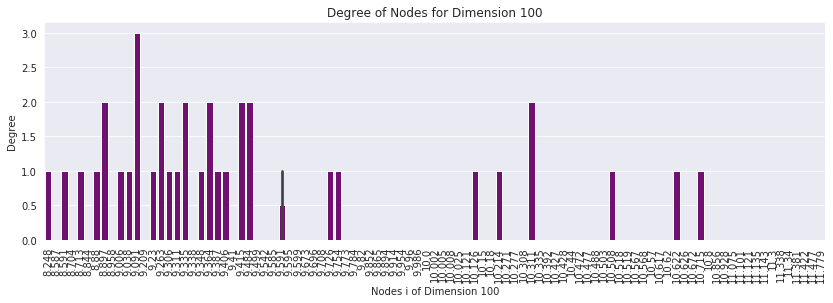

In [120]:
Ni_over_i = pd.DataFrame({'x':list(np.around(norms[99],3)), 'y':kNN[9900:10000]})

f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x='x', y='y', data=Ni_over_i, color="purple")
    ax.title.set_text("Degree of Nodes for Dimension 100")
    ax.set(xlabel="Nodes i of Dimension 100", ylabel="Degree")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

## TODO: Explain the effect of Dimension Increase on Hubness.
As you can see as the dimensions increase, there exists more of a hubness, drawing the points away from the center (lower dimension) points.

# Distribution of Pair-Wise Distances

In [166]:
from sklearn.neighbors import NearestNeighbors
import lhsmdu as lhs

hc1_samples = lhs.sample(1000,1)
hc10_samples = lhs.sample(1000,10)
hc100_samples = lhs.sample(1000,100)

In [167]:
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc1_samples)
d1, ind1 = sk_kNN.kneighbors(hc1_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc10_samples)
d10, ind10 = sk_kNN.kneighbors(hc10_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc100_samples)
d100, ind100 = sk_kNN.kneighbors(hc100_samples)

In [168]:
dist1 = []
for i in range(0,len(d1)):
    dist1.append(d1[i][1])
dist10 = []
for i in range(0, len(d10)):
    dist10.append(d10[i][1])
dist100 = []
for i in range(0, len(d100)):
    dist100.append(d100[i][1])

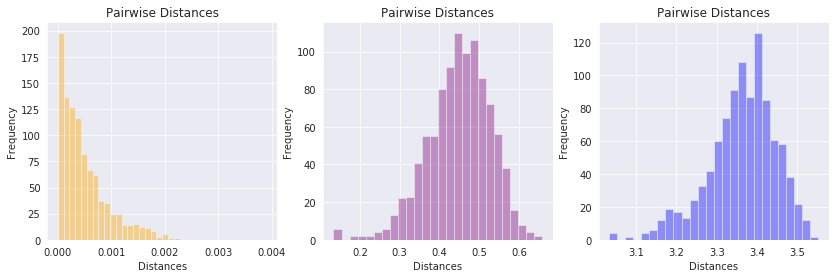

In [169]:
f = plt.figure(figsize=(14,4))
with sb.axes_style("darkgrid"):
    ax = f.add_subplot(1,3,1)
    sb.distplot(dist1, kde=False, color="orange")
    bx = f.add_subplot(1,3,2)
    sb.distplot(dist10, kde=False, color="purple")
    cx = f.add_subplot(1,3,3)
    sb.distplot(dist100, kde=False, color= "blue")
    
    ax.title.set_text("Pairwise Distances")
    ax.set(xlabel="Distances", ylabel="Frequency")
    bx.title.set_text("Pairwise Distances")
    bx.set(xlabel="Distances", ylabel="Frequency")
    cx.title.set_text("Pairwise Distances")
    cx.set(xlabel="Distances", ylabel="Frequency")

## TODO: Explain the effect of Dim on the distribution of the pair-wise distances
(as you can see the distances between the points tend to increase as we increase distance)

In [99]:
hc1_samples = lhs.sample(1000,1)
hc5_samples = lhs.sample(1000,5)
hc10_samples = lhs.sample(1000,10)
hc50_samples = lhs.sample(1000,50)
hc100_samples = lhs.sample(1000,100)

sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc1_samples)
d1, ind1 = sk_kNN.kneighbors(hc1_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc5_samples)
d5, ind5 = sk_kNN.kneighbors(hc5_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc10_samples)
d10, ind10 = sk_kNN.kneighbors(hc10_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc50_samples)
d50, ind50 = sk_kNN.kneighbors(hc50_samples)
sk_kNN = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(hc100_samples)
d100, ind100 = sk_kNN.kneighbors(hc100_samples)

dist1 = []
for i in range(0,len(d1)):
    dist1.append(d1[i][1])
dist5 = []
for i in range(0,len(d5)):
    dist5.append(d5[i][1])
dist10 = []
for i in range(0, len(d10)):
    dist10.append(d10[i][1])
dist50 = []
for i in range(0, len(d50)):
    dist50.append(d50[i][1])
dist100 = []
for i in range(0, len(d100)):
    dist100.append(d100[i][1])

avg1 = 0
for i in range(0,len(dist1)):
    avg1 += dist1[i]
avg1 = avg1/len(dist1)
avg5 = 0
for i in range(0,len(dist5)):
    avg5 += dist5[i]
avg5 = avg5/len(dist5)
avg10 = 0
for i in range(0,len(dist10)):
    avg10 += dist10[i]
avg10 = avg10/len(dist10)
avg50 = 0
for i in range(0,len(dist50)):
    avg50 += dist50[i]
avg50 = avg50/len(dist50)
avg100 = 0
for i in range(0,len(dist100)):
    avg100 += dist100[i]
avg100 = avg100/len(dist100)

In [101]:
func_of_d = [1, 5, 10, 50, 100]
avg_of_ds = [avg1, avg5, avg10, avg10, avg100]
is_x_local = pd.DataFrame({"x":func_of_d,"y":avg_of_ds})

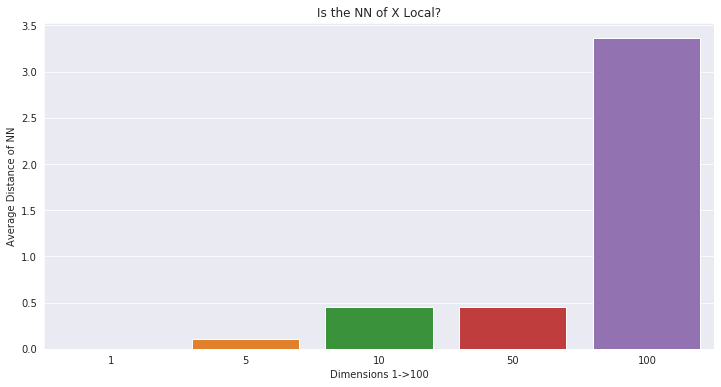

In [171]:
f = plt.figure(figsize=(12,6))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x="x", y="y", data=is_x_local)
    
    ax.title.set_text("Is the NN of X Local?")
    ax.set(xlabel="Dimensions 1->100", ylabel="Average Distance of NN")

## TODO: As you can see, no, the NN is not local to X anymore (distance increases SO much)

# Hubness of High Dimensional Data (Redo)

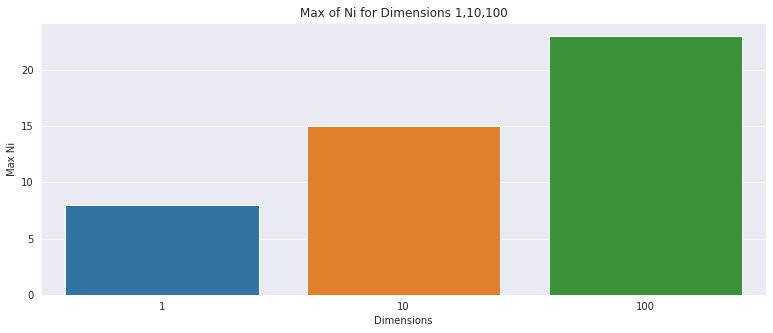

In [153]:
hub_samp = []
n = 100
hub_d1 = 1
hub_d10 = 10
hub_d100 = 100

z_cent = np.zeros(hub_d1) #from the zero-mean Gaussian Distribution
i_var = np.identity(hub_d1) #with its variance given by Id the DxD identity matrix
z_cent10 = np.zeros(hub_d10)
i_var10 = np.identity(hub_d10)
z_cent100 = np.zeros(hub_d100)
i_var100 = np.identity(hub_d100)

dim1Gaussian_hub = np.random.multivariate_normal(z_cent, i_var, n)
dim10Gaussian_hub = np.random.multivariate_normal(z_cent10, i_var10, n)
dim100Gaussian_hub = np.random.multivariate_normal(z_cent100, i_var100, n)


#calculate k-NN where k = 5
sk_kNN = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(dim1Gaussian_hub)
hub_d1, hub_ind1 = sk_kNN.kneighbors(dim1Gaussian_hub)
sk_kNN = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(dim10Gaussian_hub)
hub_d10, hub_ind10 = sk_kNN.kneighbors(dim10Gaussian_hub)
sk_kNN = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(dim100Gaussian_hub)
hub_d100, hub_ind100 = sk_kNN.kneighbors(dim100Gaussian_hub)

#Calculate max Ni for each Dim
Ni_hub1 = [0]*len(hub_ind1)
for i in range (0, len(hub_ind1)):
    for j in range(0, len(hub_ind1)):
        if i in hub_ind1[j][1:5]:
            Ni_hub1[i]+=1
hub1_N_max = max(Ni_hub1)

Ni_hub10 = [0]*len(hub_ind10)
for i in range (0, len(hub_ind10)):
    for j in range(0, len(hub_ind10)):
        if i in hub_ind10[j][1:5]:
            Ni_hub10[i]+=1
hub10_N_max = max(Ni_hub10)

Ni_hub100 = [0]*len(hub_ind100)
for i in range (0, len(hub_ind100)):
    for j in range(0, len(hub_ind100)):
        if i in hub_ind100[j][1:5]:
            Ni_hub100[i]+=1
hub100_N_max = max(Ni_hub100)

hub_max_ar = [hub1_N_max, hub10_N_max, hub100_N_max]
max_Ni_hub = pd.DataFrame({"x":[1, 10, 100],"y":hub_max_ar})

f = plt.figure(figsize=(13,5))
with sb.axes_style("darkgrid"):
    ax = sb.barplot(x="x", y="y", data=max_Ni_hub)
    ax.title.set_text("Max of Ni for Dimensions 1,10,100")
    ax.set(xlabel="Dimensions", ylabel="Max Ni")